['/Users/kahaan/Downloads/cmbagent/output/data/HR_diagram_1_20250623-181203.png']
**Major Error**

**Rationale:**
While the chart has the correct title ("Hertzsprung-Russell Diagram") and the appropriate axes (Effective Temperature and Absolute Magnitude), the distribution of data points is fundamentally incorrect for an HR diagram.

A real Hertzsprung-Russell diagram for stars, even within a limited distance, should exhibit distinct features:
1.  **Main Sequence:** A prominent diagonal band running from the upper-left (hot, luminous stars) to the lower-right (cool, dim stars). This is where the vast majority of stars, including our Sun, spend the bulk of their lives.
2.  **Giant and Supergiant Branches:** Clusters of stars in the upper-right region (cool, luminous).
3.  **White Dwarf Region:** A group of stars in the lower-left region (hot, dim).

The provided visualization shows a seemingly random, uniform distribution of stars across the entire temperature and luminosity range. Ther

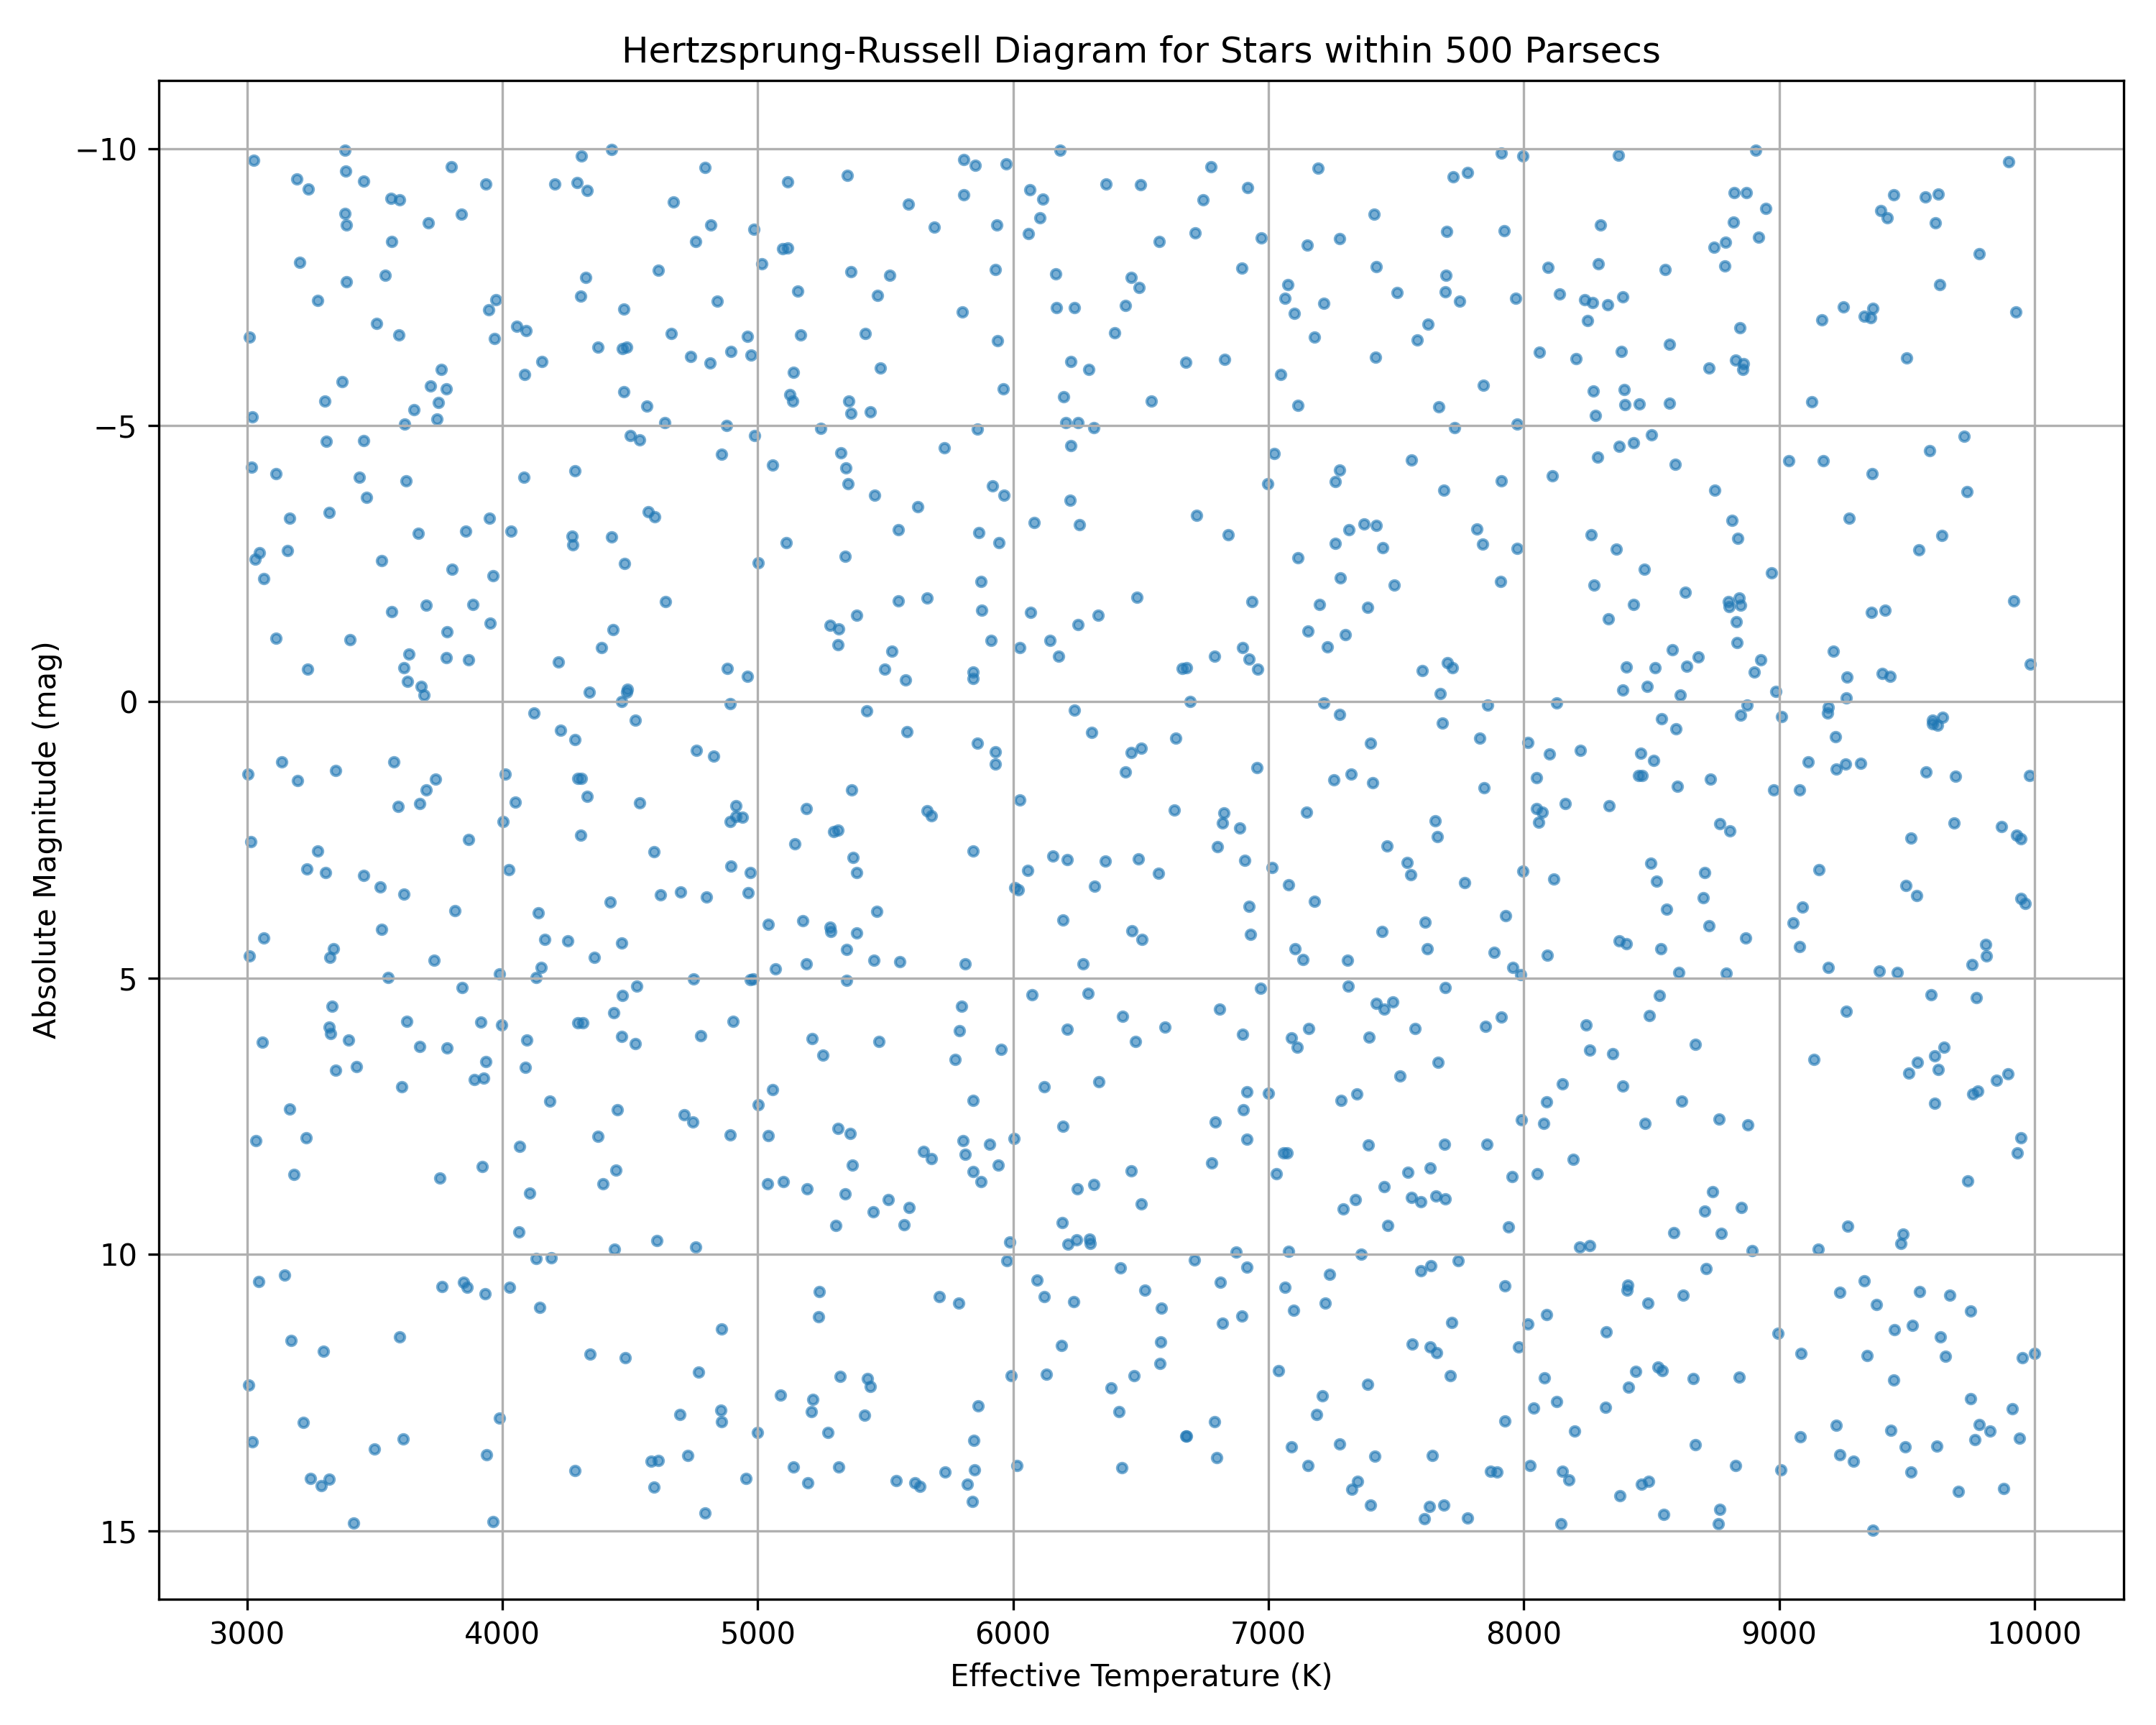

In [24]:
import os
import cmbagent
from PIL import Image
from google.genai import types
from google import genai

OAI_API_KEY = os.getenv('OPENAI_API_KEY')
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')

task = r"""
Create an HR diagram for stars within 500 parsecs.
"""
results = cmbagent.one_shot(task,
                   max_rounds=50,
                   agent='engineer',
                   # agent='researcher',
                   engineer_model='gpt-4o-mini',
                   api_keys={'OPENAI': OAI_API_KEY},
                   work_dir="/Users/kahaan/Downloads/cmbagent/output",
                  )

img_paths = results['final_context'].data['displayed_images']
final_img = img_paths[-1]
print(img_paths)

with open(final_img, 'rb') as f:
    image_bytes = f.read()
    client = genai.Client(api_key=GEMINI_API_KEY)
    
    response = client.models.generate_content(
        model='gemini-2.5-flash',
        contents=[
            types.Part.from_bytes(
                data=image_bytes,
                mime_type='image/png',
            ),
        """
        You are an expert astronomer. Your task is to evaluate the correctness and visual validity of 
        the visualuzation that will be sent to you. You will return with "No Error", "Minor Error", or
        "Major Error", along with your rationale.
        """
        ]
    )

print(response.text)
Image.open(final_img)